**Import the required files**

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Upload the data set in Google drive and mount the drive**

**Mount the Google Drive: (1) click mount the drive option and (2) allow to connect the drive**

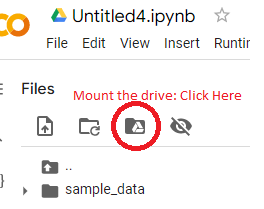

To access the file path from drive: 
(1) Click drive


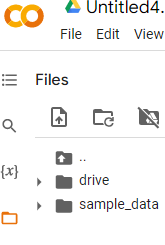

(2) Copy the path as follows:


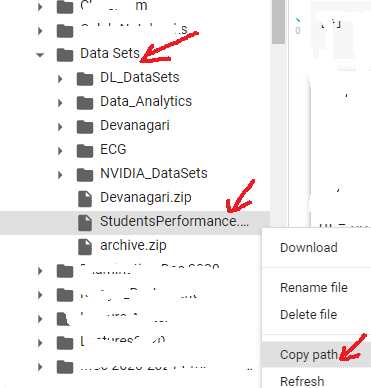



**Read the file**

In [28]:
#df = pd.read_csv(FILE, SEP)
df = pd.read_csv("/content/drive/MyDrive/stats/Stats project analysis (fastfood).csv", sep=',')

**Hint:**
df = pd.read_csv('C:/Users/ABC/Downloads/winequality-white.csv', sep=';')

OR

df = pd.read_csv('C:/Users/ABC/Downloads/StudentsPerformance.csv', sep=',')

OR  (**To read the data from the Drive**)

df = pd.read_csv("/content/drive/MyDrive/Data Sets/StudentsPerformance.csv", sep=',')

In [29]:
#Show first 5 rows
df.head()

,Timestamp,Name,Your age,Gender,Do you enjoy fast-food?,How often do you eat fast food,"What is the first thing that comes to your mind when you think of the word ""fast food""?",Do you think fast food is unhealthy?,"If yes, do you think it's more damaging than beneficial to the society?",On average how much would you expect to pay for a fast food?,Rate this questionnaire
0,8/26/2022 14:39:56,Kajal Tiwari,19,Female,Yes,Once a week,"Pizza, Pani puri",Maybe,Maybe,100,5
1,8/26/2022 14:40:16,Safeena,18,Female,Yes,Everyday,"Calories, Rolls",Yes,Yes,300,4
2,8/26/2022 14:43:35,Altaf,18,Male,Yes,Everyday,"Pizza, Calories, Rolls, Delicious, Unhealthy, ...",Yes,Yes,500,5
3,8/26/2022 14:48:30,acharikarthik01@gmail.com,18,Male,Yes,Once a week,Delicious,Maybe,Maybe,100,4
4,8/26/2022 14:55:31,Prexa patel,19,Female,Yes,Once a week,"Pizza, Momos, Pani puri",No,No,100,5


In [30]:
#Dimensions of the data set
row, col = df.shape
print(row, col)

156 11


In [31]:
df.loc[1]

Timestamp                                                                                  8/26/2022 14:40:16
Name                                                                                                 Safeena 
Your age                                                                                                   18
Gender                                                                                                 Female
Do you enjoy fast-food?                                                                                   Yes
How often do you eat fast food                                                                       Everyday
What is the first thing that comes to your mind when you think of the word "fast food"?       Calories, Rolls
Do you think fast food is unhealthy?                                                                      Yes
If yes, do you think it's more damaging than beneficial to the society?                                   Yes
On average

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   Timestamp                                                                                156 non-null    object
 1   Name                                                                                     156 non-null    object
 2   Your age                                                                                 156 non-null    int64 
 3   Gender                                                                                   156 non-null    object
 4   Do you enjoy fast-food?                                                                  156 non-null    object
 5   How often do you eat fast food                                         

In [33]:
#remove spaces in columns names

df. columns = df. columns. str. replace(' ','_')

**Data Visualization**

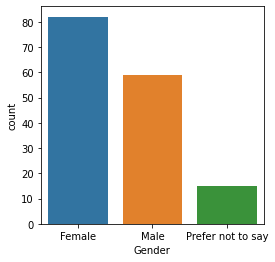

In [34]:
plt.figure(figsize=(4,4))

sns.countplot(x='Gender',data=df) 

Text(0.5, 1.0, 'Count of Male and Female)')

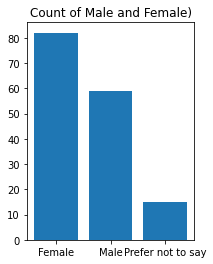

In [35]:
plt.figure(figsize=(3, 4))
Gender_count = df.groupby('Gender')['Gender'].count()

plt.bar(Gender_count.index, Gender_count.values)

plt.title('Count of Male and Female)')

In [36]:
Gender_count = df.groupby('Gender')['Gender'].count()
Gender_count

Gender
Female               82
Male                 59
Prefer not to say    15
Name: Gender, dtype: int64

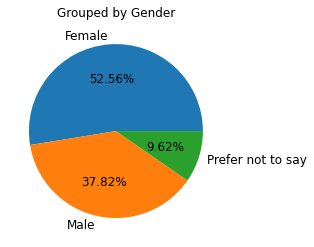

In [37]:
plt.figure(figsize=(4, 4))
plt.title('Grouped by Gender')
plt.pie(Gender_count.values, labels = ['Female', 'Male','Prefer not to say'], autopct = "%2.2f%%", textprops = {'fontsize':12})
plt.show()

Text(0.5, 1.0, 'Rate_this_questionnaire')

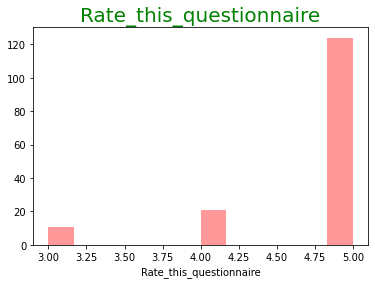

In [50]:
plt.figure(figsize=(6,4))

sns.distplot(df.Rate_this_questionnaire, kde = False, color = 'red' )

plt.title('Rate_this_questionnaire', fontsize = 20, color = 'green')




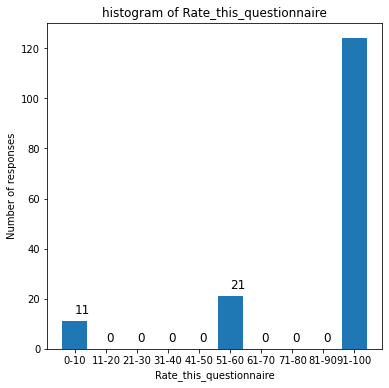

In [39]:
#Retrieve all non-null values of rate_this_questionnaire

response = df[df['Rate_this_questionnaire'].notnull()]['Rate_this_questionnaire'].values

#use histogram() function from numpy module
response_hist = np.histogram(response , bins = 10)

rate_this_questionnaire = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

plt.figure(figsize=(6, 6))
plt.title('histogram of Rate_this_questionnaire')

plt.bar(rate_this_questionnaire, response_hist[0])

plt.xlabel("Rate_this_questionnaire")
plt.ylabel("Number of responses")

for i, bin in zip(response_hist[0], range(9)):
  plt.text(bin, i+3, str(int(i)), fontsize = 12)
plt.show()


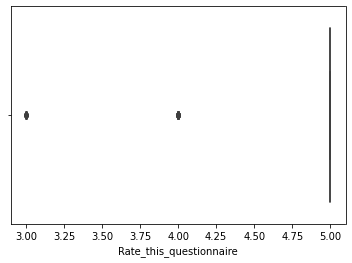

In [40]:
sns.boxplot(data = df, x = 'Rate_this_questionnaire')

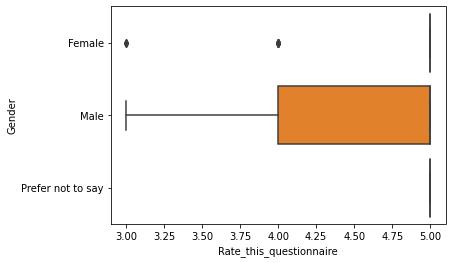

In [41]:
sns.boxplot(data = df, x = 'Rate_this_questionnaire', y = 'Gender')

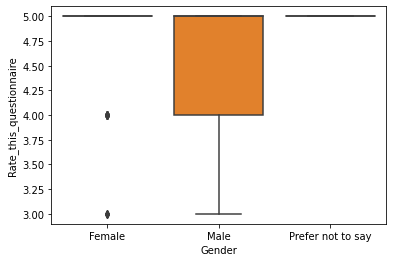

In [42]:
sns.boxplot(data = df, x = 'Gender', y = 'Rate_this_questionnaire')

Write your observation on the box plots.

**`Univariate Analysis`**

In [43]:
df.describe()

,Your_age,On_average_how_much_would_you_expect_to_pay_for_a_fast_food?,Rate_this_questionnaire
count,156.000000,156.000000,156.000000
mean,20.237179,270.512821,4.724359
std,2.088717,155.425721,0.585565
min,18.000000,100.000000,3.000000
25%,18.000000,100.000000,5.000000
50%,20.000000,300.000000,5.000000
75%,21.000000,300.000000,5.000000
max,25.000000,500.000000,5.000000


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.





**Task:**

1. Write about this result and interpretation.
2. Try the following code and explain the result:

perc =[0.10, .20, 0.30, .40, 0.50, .60, 0.70, .80, 0.90]

df.describe(percentiles=perc)


In [44]:
df.Your_age.value_counts()

18    40
20    33
19    28
21    17
22    12
24    10
25     8
23     8
Name: Your_age, dtype: int64


**Bivariate Analysis**




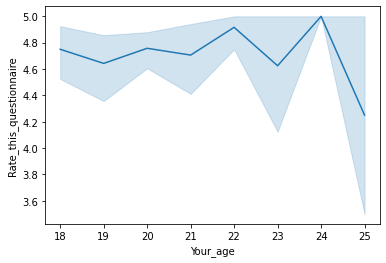

In [45]:
plt.figure(figsize=(6,4))

sns.lineplot(data = df, x = 'Your_age', y='Rate_this_questionnaire') 

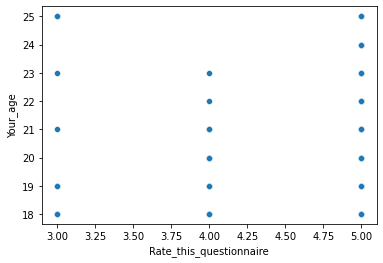

In [46]:
plt.figure(figsize=(6,4))

sns.scatterplot(data=df, x='Rate_this_questionnaire',y='Your_age')



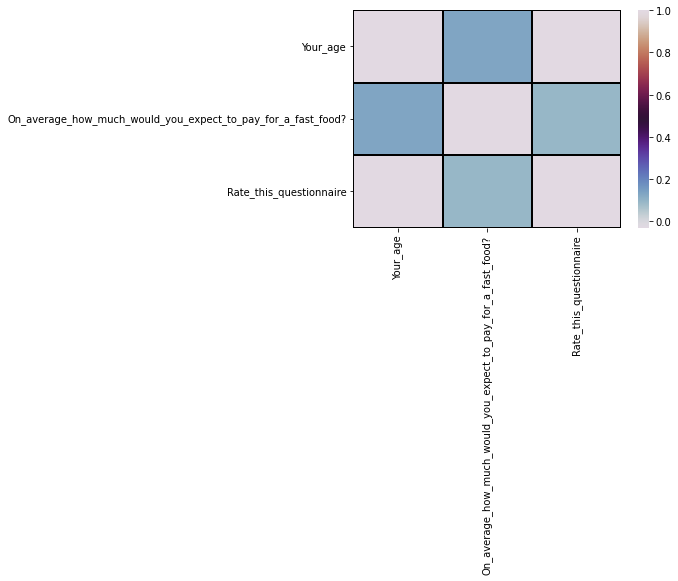

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='twilight', annot=False,linewidths=1, linecolor = 'black', cbar = True)

**Description**




A heat map is used to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building. The heat map transforms the correlation matrix into color coding.

**Try with various parameters (optional):**

vmin, vmax: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

cmap: The mapping from data values to color space.

center: The value at which to center the colormap when plotting divergent data.

annot: If True, write the data value in each cell.

fmt: String formatting code to use when adding annotations.

linewidths: Width of the lines that will divide each cell.

linecolor: Color of the lines that will divide each cell.

cbar: Whether to draw a colorbar. (Default is True)

**Description:**

Correlation between the reading score and writing score is higher. Here, as the reading score increases, the writing score also increases.

(Note: Write the desciption according to your data set)

In [48]:
np.cov(df.Rate_this_questionnaire, df.Your_age)

array([[ 0.34288668, -0.03742763],
       [-0.03742763,  4.3627378 ]])

**Explanation:**

Variance of Rate_this_questionnaire = 0.34288668

Covariance of Rate_this_questionnaire, Your_age = -0.03742763

Covariance of Your_age, Rate_this_questionnaire  = -0.03742763

Variance of Your_age = 4.3627378

cov(a, b) returns [[cov(a,a)  cov(a,b)], [cov(a,b)  cov(b,b)]



You may compare with the standard deviation given by df.describe()